### Average neural vector

### imports and load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


np.random.seed(1123)
import analysis_utilities as au

%matplotlib inline

In [ ]:
def event_trig_plt(mouse, behavior, min_time = 0, time = 1, allsess = True, trial = np.arange(1,3)):
    """ this funciton returns the event triggered activity for a given behavior
    mouse: the mouse object for a particular day
    behavior: the behavior of interest
    min_time: the minimum time the behavior has to occur for it to be included
    time: the time before and after the behavior of interest
    allsess: if true, returns the activity for all sessions, if false, returns the activity for a specific session
    trial: the trial of interest

    returns: the event triggered activity for a given behavior
    """
    # extracting the rates of the behavior
    beh_rates = mouse.rates()
    mice = {0:mouse}
    # extracting the interavals of behaviors when occuring
    beh_intervals = au.extract_epochs(mice[0],f"{behavior}")[1]
    # filtering the intervals to only include intervals that are longer than the minimum time
    beh_intervals = au.filter_epochs(beh_intervals,framerate=mice[0].FR,seconds=min_time)
    start_range, stop_range = au.behavior_start_stop(beh_intervals, time, mice[0].FR)
    xax = np.arange(-time,time,1/mice[0].FR)
    act_start_array = np.zeros(shape=(len(xax), len(mouse.cell_transients.columns), 1))
    act_stop_array = np.zeros(shape=(len(xax), len(mouse.cell_transients.columns), 1))
    
    for i in stop_range:
        act_stop = np.array(mouse.cell_transients.loc[i[0]:i[1],:].reset_index(drop=True))[:,:,np.newaxis]
        if (len(act_stop) == len(xax)):
            act_stop_array = np.concatenate([act_stop_array, act_stop], axis=2)
    
    for i in start_range:
        act_start = np.array(mouse.cell_transients.loc[i[0]:i[1],:].reset_index(drop=True))[:,:,np.newaxis]
        if (len(act_start) == len(xax)):
            act_start_array = np.concatenate([act_start_array, act_start], axis=2)

    if allsess == True:
        activity_start = act_start_array
        activity_stop = act_stop_array
        
    else:
        activity_start = act_start_array[:,:,trial]
        activity_stop = act_stop_array[:,:,trial]

    neurons = beh_rates['neuron'].reset_index()['index']
    temp_start = pd.DataFrame(tuple(activity_start[:,neurons,:].mean(axis=2)))
    temp_stop = pd.DataFrame(tuple(activity_stop[:,neurons,:].mean(axis=2)))
    
    # return temp_start, temp_stop, xax, beh_intervals
    return temp_start


In [3]:
# setting the path to the data
mouse_data_path = '/Users/andresvillegas/Documents/Experiments/Calcium_Imaging/mouse_cell_objects/days_123_aligned/'

# with open(mouse_data_path + 'exp14_wt1_day6_redo_align_345_456_cells', 'rb') as f: exp14_m2_diff = pickle.load(f)
with open(mouse_data_path + 'exp14_m2_align_123_cells.pickle', 'rb') as f: exp14_m2_123 = pickle.load(f)
with open(mouse_data_path + 'exp32_m2_align_123_cells.pickle', 'rb') as f: exp32_m2_123 = pickle.load(f)
with open(mouse_data_path + 'exp40_m3_align_123_cells.pickle', 'rb') as f: exp40_m3_123 = pickle.load(f)
with open(mouse_data_path + 'exp40_m4_align_123_cells.pickle', 'rb') as f: exp40_m4_123 = pickle.load(f)
with open(mouse_data_path + 'exp25_m2_align_123_cells.pickle', 'rb') as f: exp25_m2_123 = pickle.load(f)
with open(mouse_data_path + 'exp47_m1_align_123_cells.pickle', 'rb') as f: exp47_m1_123 = pickle.load(f)
with open(mouse_data_path + 'exp50_m2_align_123_cells.pickle', 'rb') as f: exp50_m2_123 = pickle.load(f)
with open(mouse_data_path + 'exp50_m1_align_123_cells.pickle', 'rb') as f: exp50_m1_123 = pickle.load(f)
with open(mouse_data_path + 'exp47_m2_align_123_cells.pickle', 'rb') as f: exp47_m2_123 = pickle.load(f)

def return_single_days_aligned(df, **kwargs):
    """Returns the single days of the a multi-day mouse dict object."""
    days = [df[k] for k in kwargs]
    return tuple(days)

### get the cells that are registered on days 4, 5, and 6

In [ ]:
beh = 'exploration' # change here
# day 1
# exp14_m2_d1_beh = event_trig_plt(exp14_m2_123['day1'], beh, time = .5, allsess = True)
# exp32_m2_d1_beh = event_trig_plt(exp32_m2_123['day1'], beh, time = .5, allsess = True)
# exp40_m4_d1_beh = event_trig_plt(exp40_m4_123['day1'], beh, time = .5, allsess = True)
exp25_m2_d1_beh = event_trig_plt(exp25_m2_123['day1'], beh, time = .5, allsess = True)
exp47_m1_d1_beh = event_trig_plt(exp47_m1_123['day1'], beh, time = .5, allsess = True)
exp50_m2_d1_beh = event_trig_plt(exp50_m2_123['day1'], beh, time = .5, allsess = True)
# exp50_m1_d1_beh = event_trig_plt(exp50_m1_123['day1'], beh, time = .5, allsess = True)
# exp47_m2_d1_beh = event_trig_plt(exp47_m2_123['day1'], beh, time = .5, allsess = True)

# day 2
# exp14_m2_d2_beh = event_trig_plt(exp14_m2_123['day2'], beh, time = .5, allsess = True)
# exp32_m2_d2_beh = event_trig_plt(exp32_m2_123['day2'], beh, time = .5, allsess = True)
# exp40_m4_d2_beh = event_trig_plt(exp40_m4_123['day2'], beh, time = .5, allsess = True)
exp25_m2_d2_beh = event_trig_plt(exp25_m2_123['day2'], beh, time = .5, allsess = True)
exp47_m1_d2_beh = event_trig_plt(exp47_m1_123['day2'], beh, time = .5, allsess = True)
exp50_m2_d2_beh = event_trig_plt(exp50_m2_123['day2'], beh, time = .5, allsess = True)
# exp50_m1_d2_beh = event_trig_plt(exp50_m1_123['day2'], beh, time = .5, allsess = True)
# exp47_m2_d2_beh = event_trig_plt(exp47_m2_123['day2'], beh, time = .5, allsess = True)

# # day 3
# exp14_m2_d3_beh = event_trig_plt(exp14_m2_123['day3'], beh, time = .5, allsess = True)
# exp32_m2_d3_beh = event_trig_plt(exp32_m2_123['day3'], beh, time = .5, allsess = True)
# exp40_m4_d3_beh = event_trig_plt(exp40_m4_123['day3'], beh, time = .5, allsess = True)
exp25_m2_d3_beh = event_trig_plt(exp25_m2_123['day3'], beh, time = .5, allsess = True)
exp47_m1_d3_beh = event_trig_plt(exp47_m1_123['day3'], beh, time = .5, allsess = True)
exp50_m2_d3_beh = event_trig_plt(exp50_m2_123['day3'], beh, time = .5, allsess = True)
# exp50_m1_d3_beh = event_trig_plt(exp50_m1_123['day3'], beh, time = .5, allsess = True)
# exp47_m2_d3_beh = event_trig_plt(exp47_m2_123['day3'], beh, time = .5, allsess = True)

In [56]:
# day 1 for all mice
d1_mice_sort = pd.concat([exp25_m2_d1_beh, exp47_m1_d1_beh, exp50_m2_d1_beh,], axis=1)
d1_mice_sort.columns = [i for i in range(1, len(d1_mice_sort.columns)+1)]

# day 2 for all mice
d2_mice_sort = pd.concat([exp25_m2_d2_beh, exp47_m1_d2_beh, exp50_m2_d2_beh,], axis=1)
d2_mice_sort.columns = [i for i in range(1, len(d2_mice_sort.columns)+1)]

# day 3 for all mice
d3_mice_sort = pd.concat([exp25_m2_d3_beh, exp47_m1_d3_beh, exp50_m2_d3_beh,], axis=1)
d3_mice_sort.columns = [i for i in range(1, len(d3_mice_sort.columns)+1)]

# sorting values by behavior onset for day 1 and matching for day 2
# can change the sorting here
mouse_sorting = d1_mice_sort
ix = mouse_sorting.loc[10:].mean().sort_values(ascending=False).index

d1_mice_sort = d1_mice_sort.loc[:, ix]
d2_mice_sort = d2_mice_sort.loc[:, ix]
d3_mice_sort = d3_mice_sort.loc[:, ix]

d1_mice_sort.columns = [i for i in range(1, len(d1_mice_sort.columns)+1)]
d2_mice_sort.columns = [i for i in range(1, len(d2_mice_sort.columns)+1)]
d3_mice_sort.columns = [i for i in range(1, len(d3_mice_sort.columns)+1)]

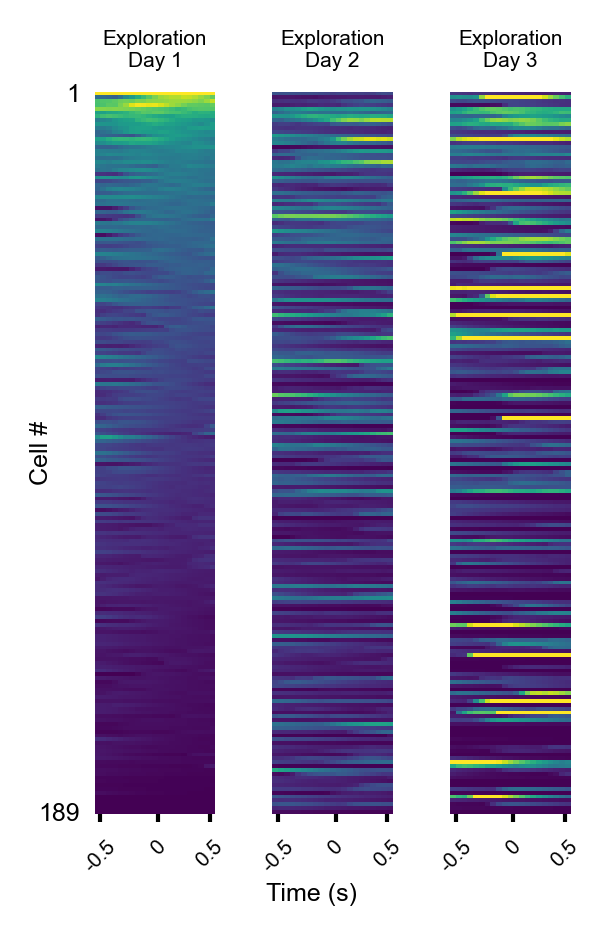

In [57]:
# plot both side by side
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(2, 3))
sns.heatmap(d1_mice_sort.T, vmin = 0, vmax = 1, cmap='viridis', ax=ax1)
ax1.set_title(beh.capitalize() + '\nDay 1', fontsize=5)
ax1.set_xticks([1, 11, 20])
ax1.set_xticklabels([-.5, 0, .5], rotation=45, fontsize=5)

sns.heatmap(d2_mice_sort.T, vmin = 0, vmax = 1, cmap='viridis', ax=ax2)
ax2.set_title(beh.capitalize() + '\nDay 2', fontsize=5)
ax2.set_xticks([1, 11, 20])
ax2.set_xticklabels([-.5, 0, .5], rotation=45, fontsize=5)

sns.heatmap(d3_mice_sort.T, vmin = 0, vmax = 1, cmap='viridis', ax=ax3)
ax3.set_title(beh.capitalize() + '\nDay 3', fontsize=5)
ax3.set_xticks([1, 11, 20])
ax3.set_xticklabels([-.5, 0, .5], rotation=45, fontsize=5)

# remove colorbar
ax1.collections[0].colorbar.remove()
ax2.collections[0].colorbar.remove()
# show only the first and last y tick and label
ax1.set_yticks([1, len(d1_mice_sort.T)])
ax1.set_yticklabels([1, len(d1_mice_sort.T)])
# change y tick symbol
ax1.tick_params(axis='y', which='both', length=0)
ax2.tick_params(axis='y', which='both', length=0)
ax3.tick_params(axis='y', which='both', length=0)

# xlabel and ylabel
fig.text(0.5, 0.01, 'Time (s)', ha='center', va='center')
fig.text(0.05, 0.5, 'Cell #', ha='center', va='center', rotation='vertical')

# make colorbar longer
cbar = ax3.collections[0].colorbar
cbar.set_ticks([0, .5, 1])
cbar.set_ticklabels([0, .5, 1])
cbar.ax.tick_params(labelsize=5)

# make x tick length smaller
ax1.tick_params(axis='x', which='both', length=2)
ax2.tick_params(axis='x', which='both', length=2)
ax3.tick_params(axis='x', which='both', length=2)

# remove the colorbar
cbar.remove()

plt.show()

# save this plot
# fig.savefig('/Users/andresvillegas/Desktop/dominance_day1_2_3_vectors_day1_sort.png', dpi=300, bbox_inches='tight')

# save in svg format
# fig.savefig('/Users/andresvillegas/Desktop/attack_day1_2_3_vectors_day1_sort.svg')

In [ ]:
# calculate spearmans correlaation for the 3 vectors and correct for multiple comparisons
# import spermanr
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
test = spearmanr
# calculate Spearman's correlation and p-value for vector1 and vector2
corr1, p1 = test(vector1, vector2)
# calculate Spearman's correlation and p-value for vector1 and vector3
corr2, p2 = test(vector1, vector3)
# calculate Spearman's correlation and p-value for vector2 and vector3
corr3, p3 = test(vector2, vector3)
# create a list of correlation values
correlations = [corr1, corr2, corr3]

# create a list of p-values
p_values = [p1, p2, p3]

# apply multiple comparisons correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# print the corrected p-values
for i, p_value in enumerate(corrected_p_values):
    print(f'Corrected p-value for correlation {i+1}: {p_value:.7f}')
# print correlations
for i, correlation in enumerate(correlations):
    print(f'Correlation {i+1}: {correlation:.3f}')

print(p_values)
print(correlations)


Corrected p-value for correlation 1: 0.0000000
Corrected p-value for correlation 2: 0.0000002
Corrected p-value for correlation 3: 0.0000004
Correlation 1: 0.420
Correlation 2: 0.382
Correlation 3: 0.376
[2.3083725746220016e-09, 7.664352509066353e-08, 1.2527185418846767e-07]
[0.42043088456750694, 0.3816559357356321, 0.3757945628913371]


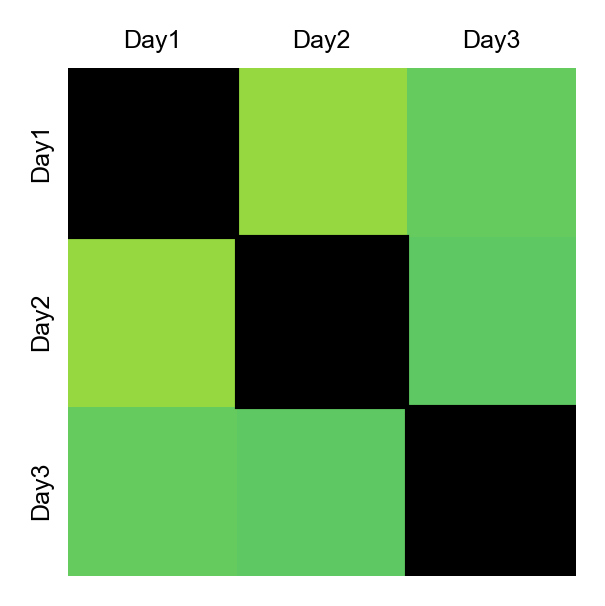

In [ ]:
from matplotlib.patches import Rectangle
# create a correlation matrix
corr_matrix = np.array([[1, corr1, corr2], [corr1, 1, corr3], [corr2, corr3, 1]])
# create a p-value matrix
p_matrix = np.array([[1, p1, p2], [p1, 1, p3], [p2, p3, 1]])

# set the diagonal elements to NaN
np.fill_diagonal(corr_matrix, np.nan)
np.fill_diagonal(p_matrix, np.nan)

# plot the heatmap
sns.heatmap(corr_matrix, cmap='viridis', mask=np.isnan(corr_matrix), vmin=0, vmax=0.5, cbar=True)

# get the current axes
ax = plt.gca()

# get the number of rows and columns in the correlation matrix
num_rows, num_cols = corr_matrix.shape

# iterate over the diagonal elements and set the color to black
for i in range(num_rows):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=True, color='black', alpha=1))

# label the x and y axis
ax.set_xticklabels(['Day1', 'Day2', 'Day3'])
ax.set_yticklabels(['Day1', 'Day2', 'Day3'])
# place the xlabel on top
ax.xaxis.set_ticks_position('top')
# remove ticks
ax.tick_params(length=0)

# REMOVE COLORBAR
ax.collections[0].colorbar.remove()